In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px


In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,0,4,1,1,0,0,1,1,2,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,0,1,1,1,0,0,1,1,2,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,0,1,1,1,0,0,1,1,2,E01002583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
597969,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
597970,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
597971,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               597973 non-null  object 
 1   accident_year                                597973 non-null  int64  
 2   accident_reference                           597973 non-null  object 
 3   location_easting_osgr                        597850 non-null  float64
 4   location_northing_osgr                       597850 non-null  float64
 5   longitude                                    597840 non-null  float64
 6   latitude                                     597840 non-null  float64
 7   police_force                                 597973 non-null  int64  
 8   accident_severity                            597973 non-null  int64  
 9   number_of_vehicles                           597973 non-nul

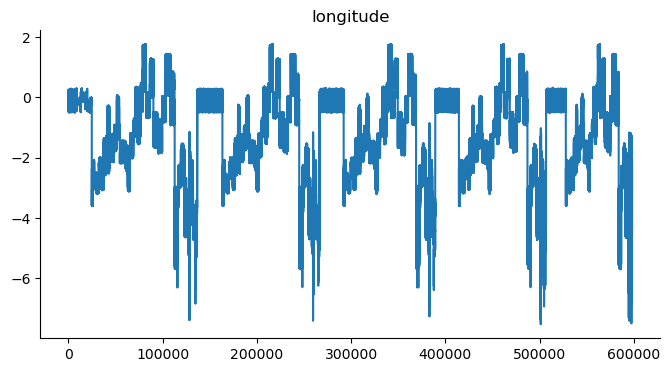

In [5]:
df['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

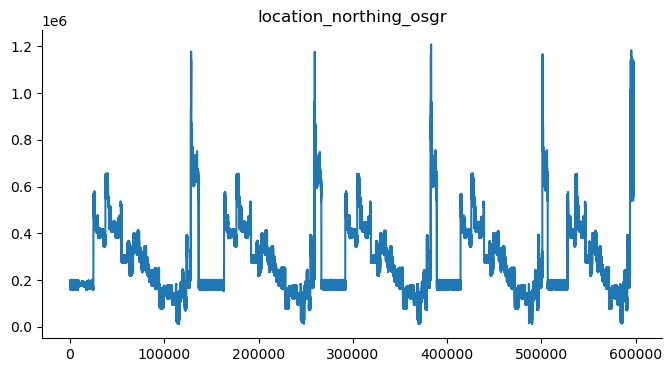

In [6]:
df['location_northing_osgr'].plot(kind='line', figsize=(8, 4), title='location_northing_osgr')
plt.gca().spines[['top', 'right']].set_visible(False)

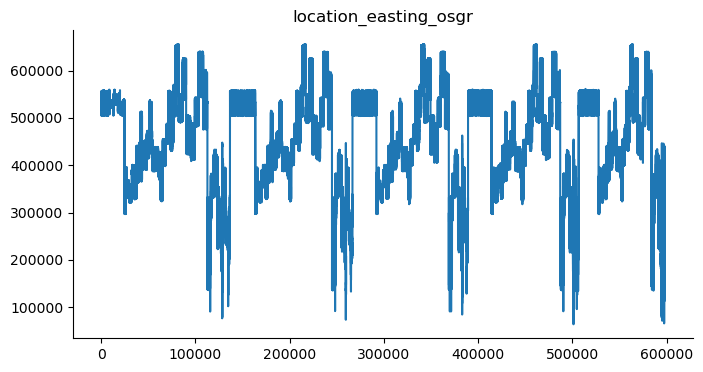

In [7]:
df['location_easting_osgr'].plot(kind='line', figsize=(8, 4), title='location_easting_osgr')
plt.gca().spines[['top', 'right']].set_visible(False)

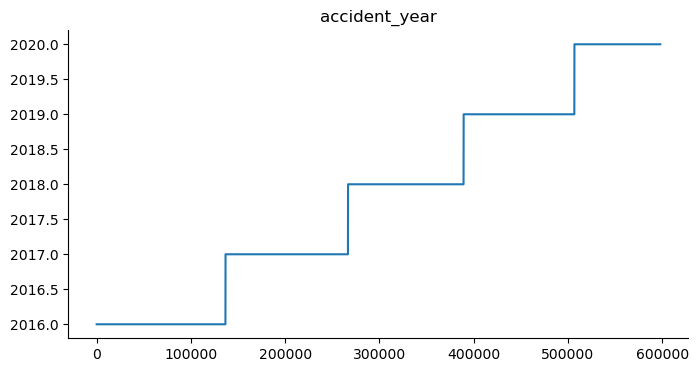

In [8]:
df['accident_year'].plot(kind='line', figsize=(8, 4), title='accident_year')
plt.gca().spines[['top', 'right']].set_visible(False)

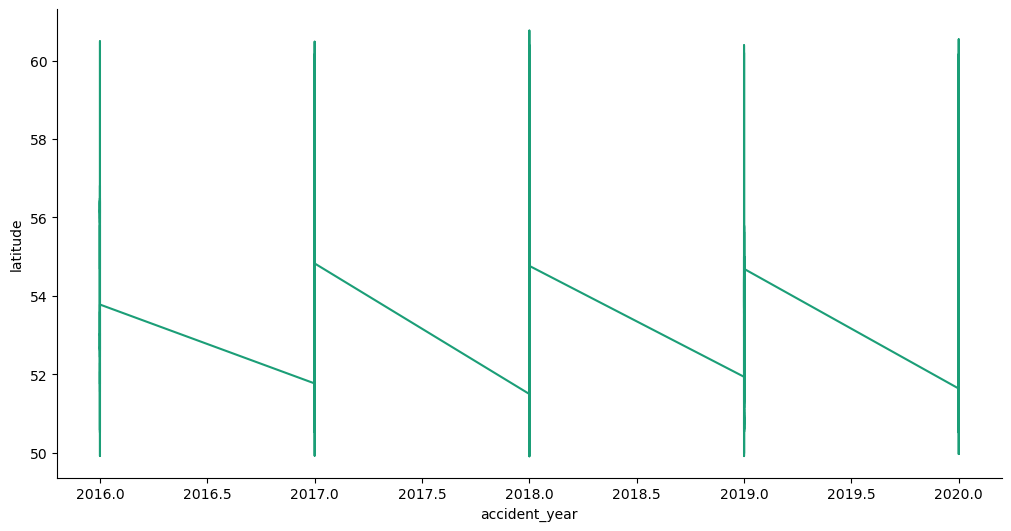

In [9]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accident_year']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('accident_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accident_year')
_ = plt.ylabel('latitude')

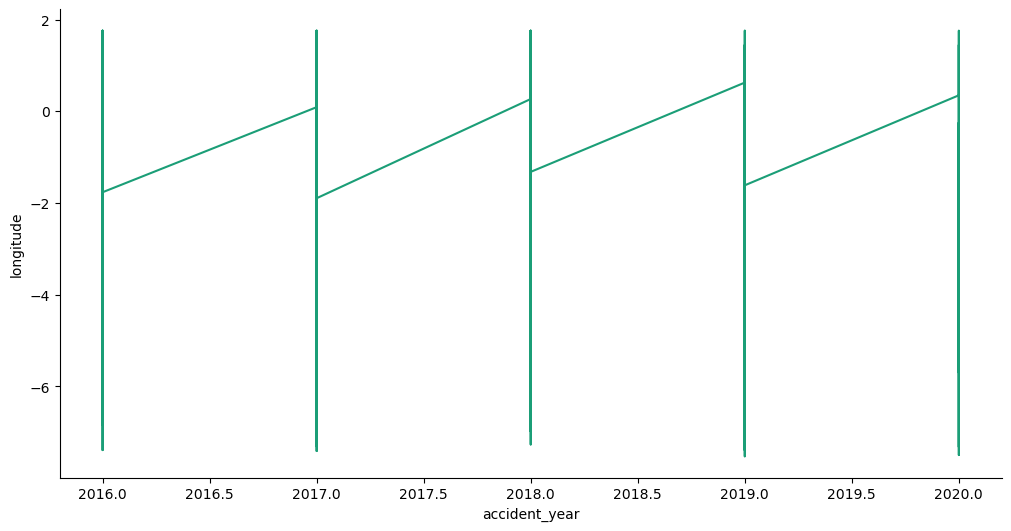

In [10]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accident_year']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('accident_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accident_year')
_ = plt.ylabel('longitude')

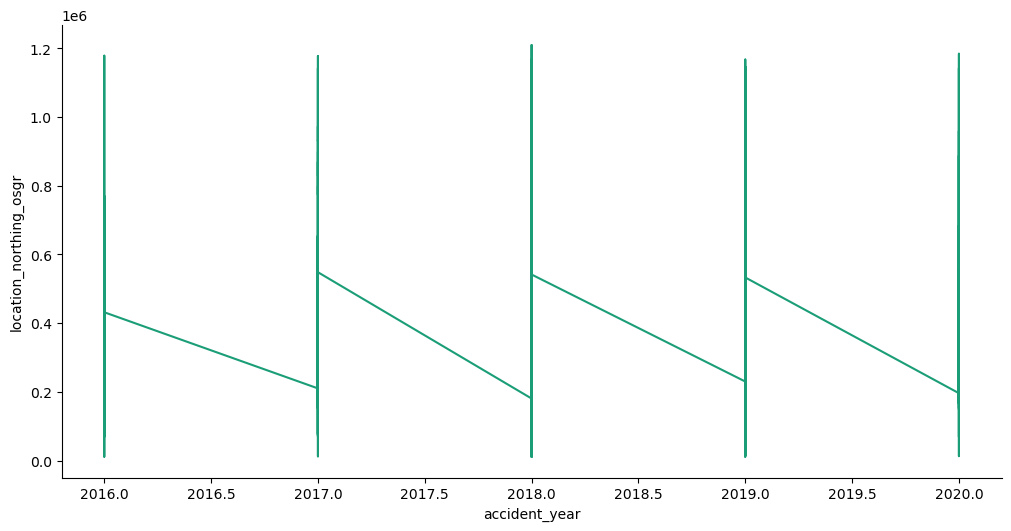

In [11]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accident_year']
  ys = series['location_northing_osgr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('accident_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accident_year')
_ = plt.ylabel('location_northing_osgr')

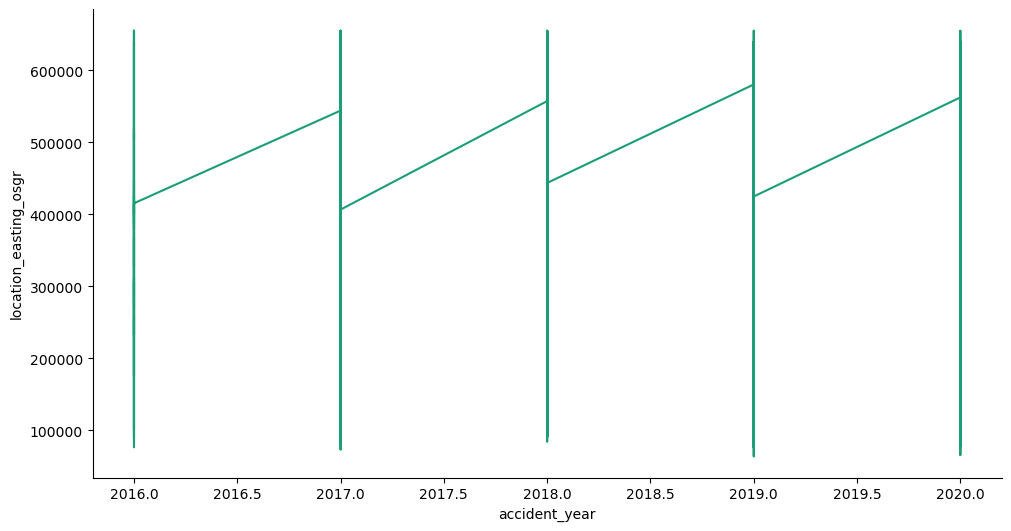

In [12]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accident_year']
  ys = series['location_easting_osgr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('accident_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accident_year')
_ = plt.ylabel('location_easting_osgr')

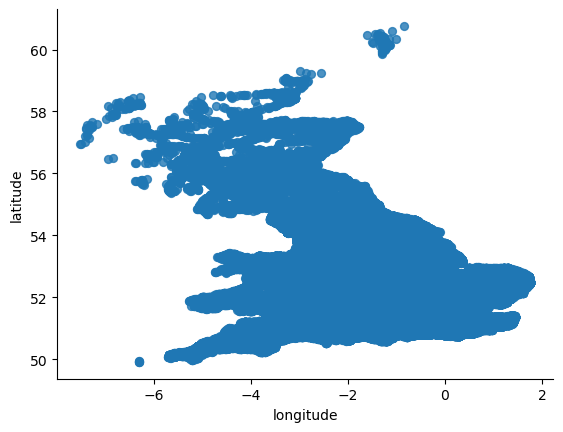

In [13]:
df.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

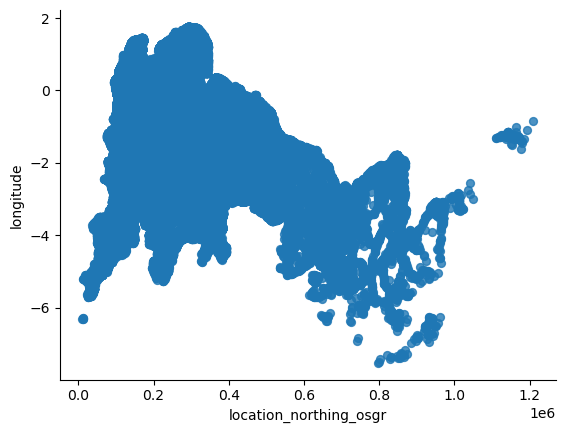

In [14]:
df.plot(kind='scatter', x='location_northing_osgr', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

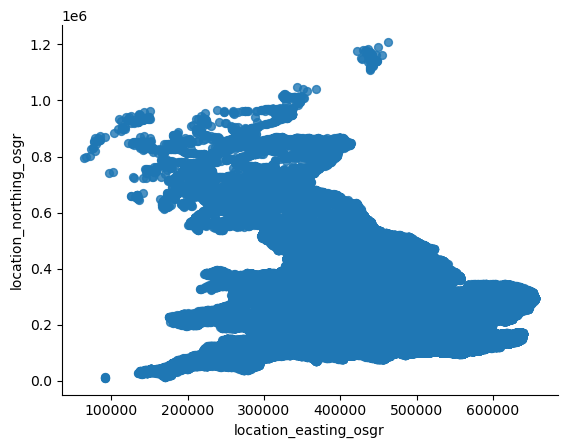

In [15]:
df.plot(kind='scatter', x='location_easting_osgr', y='location_northing_osgr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

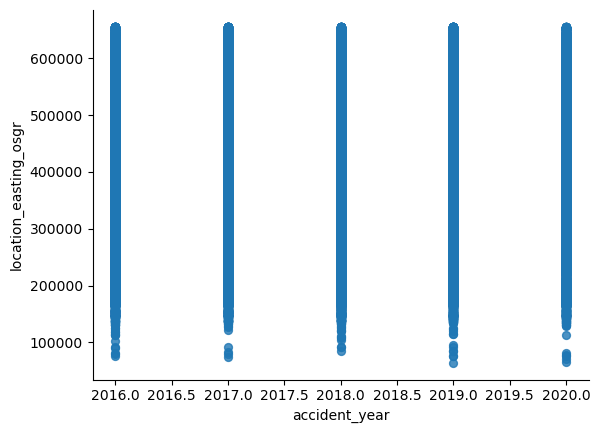

In [16]:
df.plot(kind='scatter', x='accident_year', y='location_easting_osgr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

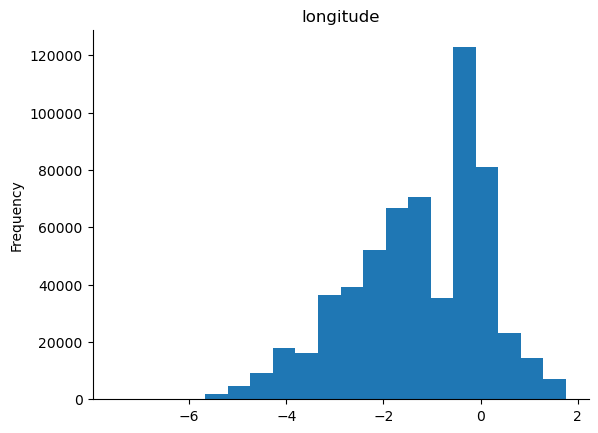

In [17]:
df['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

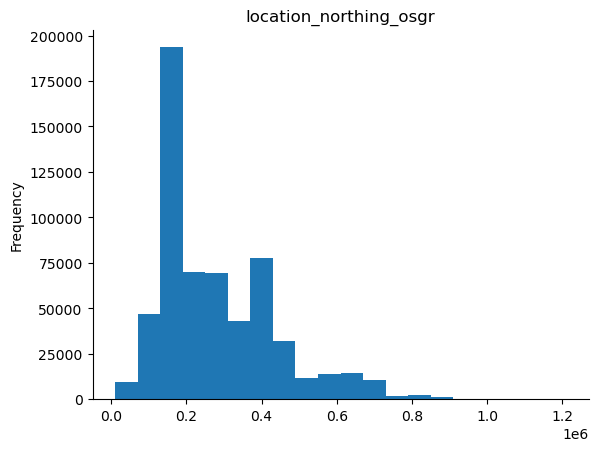

In [18]:
df['location_northing_osgr'].plot(kind='hist', bins=20, title='location_northing_osgr')
plt.gca().spines[['top', 'right',]].set_visible(False)

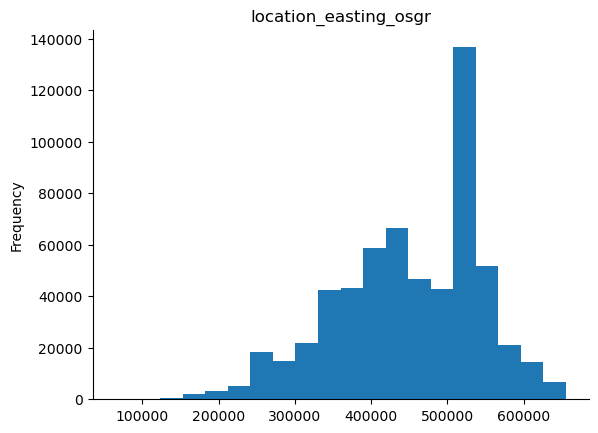

In [19]:
df['location_easting_osgr'].plot(kind='hist', bins=20, title='location_easting_osgr')
plt.gca().spines[['top', 'right',]].set_visible(False)

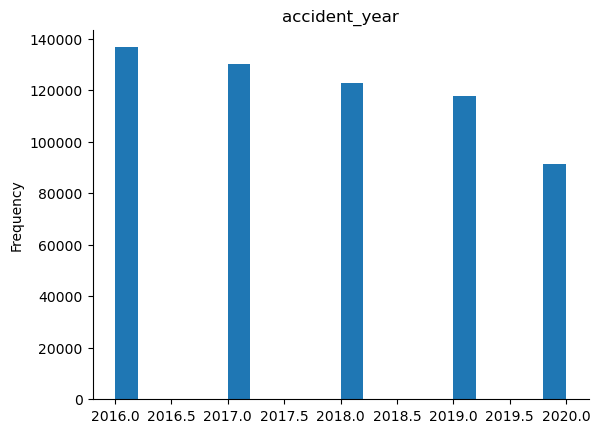

In [20]:
df['accident_year'].plot(kind='hist', bins=20, title='accident_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
df.isna().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          123
location_northing_osgr                         123
longitude                                      133
latitude                                       133
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [22]:
df.dropna(inplace=True)
df.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [23]:
df.duplicated().sum()

0

In [24]:
unwanted_cols=['lsoa_of_accident_location','accident_index','accident_reference','date','accident_year']

In [25]:
df.drop(columns=unwanted_cols,inplace=True)

In [26]:
df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,02:30,...,0,0,5,1,1,0,0,1,1,2
1,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,00:37,...,0,0,4,1,1,0,0,1,1,2
2,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,01:25,...,0,0,4,1,1,0,0,1,1,2
3,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,09:15,...,0,0,1,1,1,0,0,1,1,2
4,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,07:53,...,0,0,1,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,14:30,...,0,0,1,1,1,0,0,1,1,-1
597969,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,15:05,...,0,0,1,1,1,0,0,1,2,-1
597970,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,12:42,...,0,0,1,1,1,0,0,2,1,-1
597971,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,14:00,...,0,0,1,1,1,0,0,1,2,-1


In [27]:
df['time']

0         02:30
1         00:37
2         01:25
3         09:15
4         07:53
          ...  
597968    14:30
597969    15:05
597970    12:42
597971    14:00
597972    13:50
Name: time, Length: 597803, dtype: object

In [28]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hour
0,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,2024-05-24 02:30:00,...,0,5,1,1,0,0,1,1,2,2
1,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,2024-05-24 00:37:00,...,0,4,1,1,0,0,1,1,2,0
2,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,2024-05-24 01:25:00,...,0,4,1,1,0,0,1,1,2,1
3,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,2024-05-24 09:15:00,...,0,1,1,1,0,0,1,1,2,9
4,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,2024-05-24 07:53:00,...,0,1,1,1,0,0,1,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,2024-05-24 14:30:00,...,0,1,1,1,0,0,1,1,-1,14
597969,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,2024-05-24 15:05:00,...,0,1,1,1,0,0,1,2,-1,15
597970,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,2024-05-24 12:42:00,...,0,1,1,1,0,0,2,1,-1,12
597971,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,2024-05-24 14:00:00,...,0,1,1,1,0,0,1,2,-1,14


In [29]:
df['time']=df['hour']
df.drop('hour',axis=1,inplace=True)
df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,2,...,0,0,5,1,1,0,0,1,1,2
1,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,0,...,0,0,4,1,1,0,0,1,1,2
2,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,1,...,0,0,4,1,1,0,0,1,1,2
3,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,9,...,0,0,1,1,1,0,0,1,1,2
4,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,7,...,0,0,1,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,14,...,0,0,1,1,1,0,0,1,1,-1
597969,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,15,...,0,0,1,1,1,0,0,1,2,-1
597970,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,12,...,0,0,1,1,1,0,0,2,1,-1
597971,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,14,...,0,0,1,1,1,0,0,1,2,-1


In [30]:
obj_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj_cols.append(i)
obj_cols

['local_authority_ons_district', 'local_authority_highway']

In [31]:
df['local_authority_ons_district'].nunique()

383

In [32]:
df['local_authority_highway'].nunique()

208

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
for i in obj_cols:
    df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597803 entries, 0 to 597972
Data columns (total 31 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   location_easting_osgr                        597803 non-null  float64
 1   location_northing_osgr                       597803 non-null  float64
 2   longitude                                    597803 non-null  float64
 3   latitude                                     597803 non-null  float64
 4   police_force                                 597803 non-null  int64  
 5   accident_severity                            597803 non-null  int64  
 6   number_of_vehicles                           597803 non-null  int64  
 7   number_of_casualties                         597803 non-null  int64  
 8   day_of_week                                  597803 non-null  int64  
 9   time                                         597803 non-null  in

In [35]:
df.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,597803.000000,5.978030e+05,597803.000000,597803.000000,597803.000000,597803.000000,597803.000000,597803.000000,597803.000000,597803.000000,...,597803.000000,597803.000000,597803.000000,597803.00000,597803.000000,597803.000000,597803.000000,597803.000000,597803.000000,597803.000000
mean,451702.219790,2.820424e+05,-1.260248,52.425666,28.571901,2.792090,1.842221,1.307260,4.109941,13.614164,...,0.204870,1.044508,2.024152,1.62780,1.364006,0.195784,0.151650,1.331313,1.316372,1.669793
std,94931.246353,1.528678e+05,1.392037,1.376893,24.913474,0.437892,0.709945,0.756517,1.924952,5.146324,...,1.289671,2.260131,1.713950,1.79121,0.886070,1.163503,1.049602,0.470700,0.537868,0.863529
min,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,388019.500000,1.757050e+05,-2.180568,51.467411,5.000000,3.000000,1.000000,1.000000,2.000000,10.000000,...,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,457990.000000,2.227060e+05,-1.143597,51.887986,23.000000,3.000000,2.000000,1.000000,4.000000,14.000000,...,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,528979.500000,3.873815e+05,-0.141018,53.380797,45.000000,3.000000,2.000000,1.000000,6.000000,17.000000,...,0.000000,0.000000,4.000000,1.00000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,23.000000,...,9.000000,9.000000,7.000000,9.00000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [36]:
# from sklearn.preprocessing import StandardScaler

In [37]:
# sc=StandardScaler()

In [38]:
# cols=list(df.columns)
# l=['location_easting_osgr','location_northing_osgr','longitude','latitude']
# for i in l:
#     cols.remove(i)
# cols

In [39]:
# for i in cols:
#     scaled_df=sc.fit_transform(df[cols])
# scaled_df

In [40]:
# scaled_df=pd.DataFrame(scaled_df,columns=cols)
# for i in cols:
#     df[i]=scaled_df[i]
# df

In [41]:
df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,2,...,0,0,5,1,1,0,0,1,1,2
1,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,0,...,0,0,4,1,1,0,0,1,1,2
2,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,1,...,0,0,4,1,1,0,0,1,1,2
3,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,9,...,0,0,1,1,1,0,0,1,1,2
4,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,7,...,0,0,1,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,14,...,0,0,1,1,1,0,0,1,1,-1
597969,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,15,...,0,0,1,1,1,0,0,1,2,-1
597970,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,12,...,0,0,1,1,1,0,0,2,1,-1
597971,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,14,...,0,0,1,1,1,0,0,1,2,-1


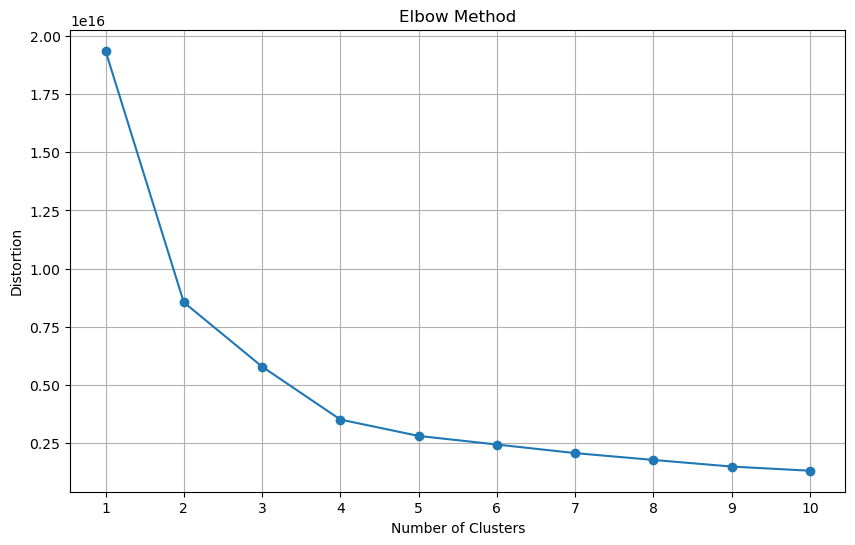

In [42]:
def elbow_method(df, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        distortions.append(kmeans.inertia_)
    return distortions


max_clusters = 10
distortions = elbow_method(df, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [43]:
distortions

[1.9359192388551096e+16,
 8555995869452589.0,
 5793739875139966.0,
 3520833763507013.0,
 2817808234265025.0,
 2447883020276836.0,
 2080193607435089.5,
 1785985169718899.0,
 1501914959801508.2,
 1323545732992521.5]

In [44]:
kmodel=KMeans(n_clusters=2,max_iter=150,random_state=50)
kmodel.fit(df)

KMeans(max_iter=150, n_clusters=2, random_state=50)

In [45]:
kmodel.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
df['2ClusterID']=kmodel.labels_

In [47]:
df['2ClusterID'].value_counts()

2ClusterID
0    399466
1    198337
Name: count, dtype: int64

In [48]:
kmodel=KMeans(n_clusters=3,max_iter=150,random_state=50)
kmodel.fit(df)

KMeans(max_iter=150, n_clusters=3, random_state=50)

In [49]:
df['3ClusterID']=kmodel.labels_
df['3ClusterID'].value_counts()

3ClusterID
0    336200
2    207251
1     54352
Name: count, dtype: int64

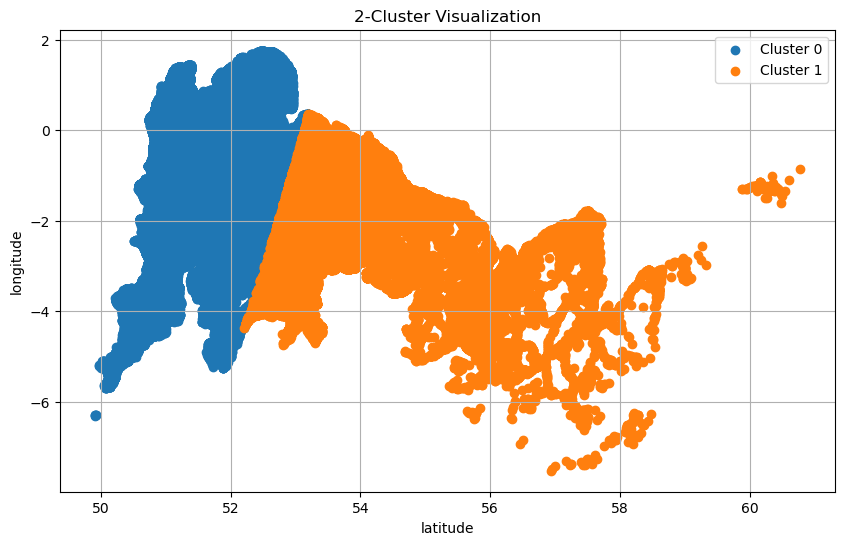

In [50]:
# Scatter plot for 2 clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(2):
    cluster_data = df[df['2ClusterID'] == cluster_id]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_id}')

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('2-Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()


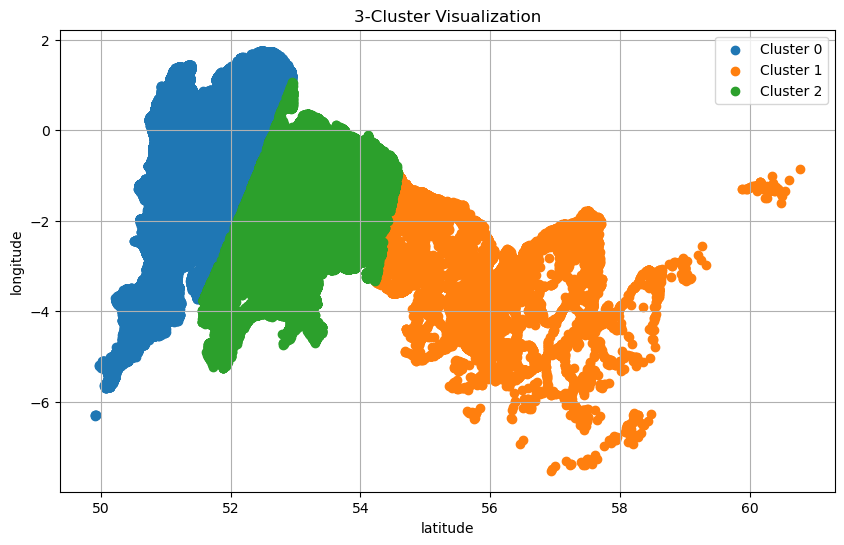

In [51]:
# Scatter plot for 3 clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    cluster_data = df[df['3ClusterID'] == cluster_id]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_id}')

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('3-Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()


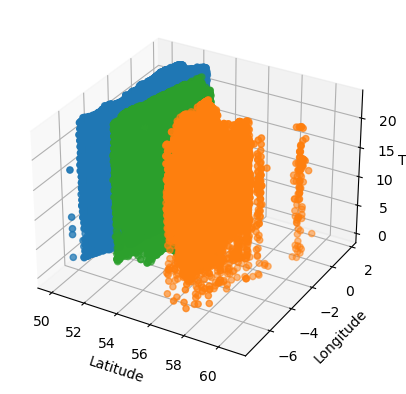

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster_id in range(3):
    cluster_data = df[df['3ClusterID'] == cluster_id]
    ax.scatter(cluster_data['latitude'], cluster_data['longitude'], cluster_data['time'], label=f'Cluster {cluster_id}')
    
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Time')

plt.show()

In [53]:
dbscan_data=df.drop(columns=['2ClusterID','3ClusterID'])

In [54]:
dbscan = DBSCAN(eps=10,min_samples=1000) #Adjust eps and min_samples as needed
clusters=dbscan.fit_predict(dbscan_data)
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

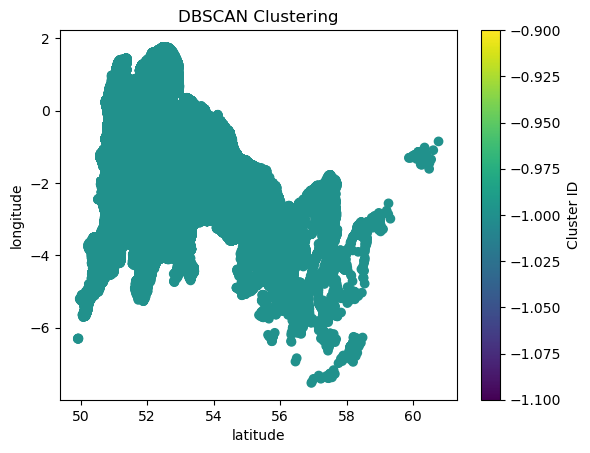

In [55]:
plt.scatter(dbscan_data['latitude'], dbscan_data['longitude'], c=clusters, cmap='viridis')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster ID')
plt.show()